# Logistic regression modeling and interpretation using Yelp reviews

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Read data

In [2]:
reviews = pd.read_csv('data/reviews.csv')

## <span style="color:blue">   Logistic regression Run #1

### Feature inportance will be checked with scaled input data

# Log some features

In [3]:
# reviews.loc[reviews['photos']>20, 'photos'] = 20
# reviews.loc[reviews['friends']>50, 'friends'] = 50
# reviews.loc[reviews['numSentence']>10, 'numSentence'] = 10
# reviews.loc[reviews['numWords']>100, 'numWords'] = 100
# reviews.loc[reviews['reviews']>100, 'reviews'] = 100
# reviews.loc[reviews['totSentiment']>20, 'totSentiment'] = 20

In [4]:
reviews.loc[:,['photos','friends','numSentence','numWords','reviews','totSentiment']] = np.log(reviews.loc[:,['photos','friends','numSentence','numWords','reviews','totSentiment']]+2)

# Balance the data

In [5]:
n_not_recomended = (reviews['regular'] == 0).sum()
reg_reviews = reviews[reviews['regular'] == 1].sample(n=n_not_recomended, random_state=1)
not_reviews = reviews[reviews['regular'] == 0].sample(n=n_not_recomended, random_state=1)

balanced_reviews = reg_reviews.append(not_reviews).sample(frac=1.)
len(balanced_reviews), len(reviews)

(54114, 252508)

# Normalize data

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

y = balanced_reviews['regular']
X = balanced_reviews.copy()
del X['regular']
columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)

# Fit a linear model and Analysis on coefficients

R2 score 0.404111002297


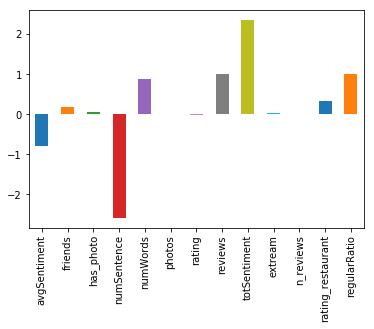

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

clf = LinearRegression()
clf.fit(X, y)
pd.Series(clf.coef_, index=columns).plot(kind='bar');

y_pred = clf.predict(X)
print('R2 score', r2_score(y, y_pred))

# Same but with LogisticRegression

R2 score 0.201167904794


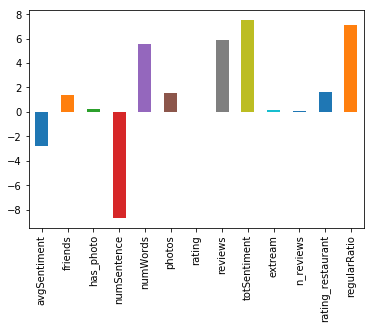

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

clf2 = LogisticRegression()
clf2.fit(X, y)
pd.Series(clf2.coef_[0], index=columns).plot(kind='bar');

y_pred = clf2.predict(X)

print('R2 score', r2_score(y, y_pred))

# TODO interpret the result

## <span style="color:blue"> Interpretation of logistic regression equation
    
- Each predictor variable will be explored from the min to the max values
- Rest of the predictor values will remain as a mean constant value


### Probability of a review being 'regular' w/ review value change

In [9]:
bad_features = ['rating', 'extream', 'n_reviews']

weights = pd.Series(clf.coef_, index=columns)
weights = weights[~weights.index.isin(bad_features)]
weights

avgSentiment        -0.788170
friends              0.182516
has_photo            0.065100
numSentence         -2.585499
numWords             0.867750
photos               0.016209
reviews              1.002484
totSentiment         2.346700
rating_restaurant    0.323219
regularRatio         0.997815
dtype: float64

In [ ]:
'photos','friends','numSentence','numWords','reviews','totSentiment']


### Model (regression): 

regular_hat = -0.788*avgSentiment +0.182*log_friends +0.065*has_photo -2.58*log_numSentence +0.867*log_numWords +0.016*log_photos +1.00*log_reviews +2.34*log_totSentiment +0.323*rating_restaurant +0.997*regularRatio

### Model interpretation:


In [18]:
X2 = balanced_reviews.copy()
del X2['regular']
X2.shape
list(X2)

['avgSentiment',
 'friends',
 'has_photo',
 'numSentence',
 'numWords',
 'photos',
 'rating',
 'reviews',
 'totSentiment',
 'extream',
 'n_reviews',
 'rating_restaurant',
 'regularRatio']

In [15]:
testScale = pd.DataFrame(columns = list(X2) )
testScale.loc[0,:] = 0
testScale.loc[1,:] = 1
testScale.loc[2,:] = 2

In [17]:
X1 = scaler.inverse_transform(testScale)
print(X1)

[[  0.00000000e+00   6.93147181e-01   0.00000000e+00   6.93147181e-01
    6.93147181e-01   6.93147181e-01   1.00000000e+00   1.09861229e+00
    6.93147181e-01   0.00000000e+00   0.00000000e+00  -1.00000000e+00
    0.00000000e+00]
 [  4.00000000e+00   8.51759311e+00   1.00000000e+00   4.63472899e+00
    6.90975328e+00   1.11679814e+01   5.00000000e+00   9.42157327e+00
    5.31811999e+00   1.00000000e+00   4.82600000e+03   5.00000000e+00
    1.00000000e+00]
 [  8.00000000e+00   1.63420390e+01   2.00000000e+00   8.57631080e+00
    1.31263594e+01   2.16428157e+01   9.00000000e+00   1.77445343e+01
    9.94309281e+00   2.00000000e+00   9.65200000e+03   1.10000000e+01
    2.00000000e+00]]
